<a href="https://colab.research.google.com/github/Sara-Juniyat/Health-Information-System/blob/master/Generic_Stress_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'stress:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F191041%2F426002%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240521%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240521T113857Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D68bff07e8e3fc3774afbfb9e627dc313490bd8f053dabe6abbe9296eb44720f145669423812de8a3045bc6336f78209df010d745739dcc366ba213f6474fa84348ade0069574171f109a17d3545fa8a3fe8d9a839afd3c46bdf29294935be3aca5b9e366c08e12572b287b0b1bb7dad0329dc6c27bd6a897684f65fb3456639f1cb25a7717e209c7763b4d4181f453252d71efa9c52511eb1ff169bbbb921fd219b92ae0d76a96bd7a0d871f1ff89d606ce712852214e9d7d2adaeba7126230fd3e5e2a47a80f1bb0f5defebc17c36c34522bf60dff34c63729784c4a4cd7b029ca568375c8707bad9974e2b80129b6625037ca0b788cba9d2f3974fc2118dbc'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 5623939830 bytes downloaded
Downloaded and uncompressed: stress
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stress/dataset/dataset description.pdf
/kaggle/input/stress/dataset/1. processed/eda/swell/p9.xlsx
/kaggle/input/stress/dataset/1. processed/eda/swell/p13.xlsx
/kaggle/input/stress/dataset/1. processed/eda/swell/p15.xlsx
/kaggle/input/stress/dataset/1. processed/eda/swell/p16.xlsx
/kaggle/input/stress/dataset/1. processed/eda/swell/p17.xlsx
/kaggle/input/stress/dataset/1. processed/eda/swell/p20.xlsx
/kaggle/input/stress/dataset/1. processed/eda/swell/p1.xlsx
/kaggle/input/stress/dataset/1. processed/eda/swell/p18.xlsx
/kaggle/input/stress/dataset/1. processed/eda/swell/p3.xlsx
/kaggle/input/stress/dataset/1. processed/eda/swell/p5.xlsx
/kaggle/input/stress/dataset/1. processed/eda/swell/p7.xlsx
/kaggle/input/stress/dataset/1. processed/eda/swell/p19.xlsx
/kaggle/input/stress/dataset/1. processed/eda/swell/p12.xlsx
/kaggle/input/stress/dataset/1. processed/eda/swell/p25.xlsx
/kaggle/input/stress/dataset/1. processed/eda/swell/p10.xlsx
/kaggle/input/stress/dataset/1. proce

In [3]:
import pandas as pd
import numpy as np
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import random
import time
# Start the timer
start_time = time.time()

In [4]:
#data source - https://www.kaggle.com/datasets/qiriro/stress
#loading swell dataset
swell = pd.read_csv("/kaggle/input/stress/dataset/2. final/datasets/hrv/swell/combined/classification/combined-swell-classification-hrv-dataset.csv")
swell

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,KURT_SQUARE,HR_SQRT,MEAN_RR_MEAN_MEAN_REL_RR,SD2_LF,HR_LF,HR_HF,HF_VLF,NasaTLX class,Condition Label,NasaTLX Label
0,1183.843150,1181.251800,365.254690,16.232314,16.228591,22.501702,58.411211,10.466667,1.400000,11.479176,...,0.139715,7.642723,2.419575e+06,1.233729,0.139544,2.164920,0.004441,high,2,2
1,1021.041857,1022.250750,100.521147,21.561202,21.561202,4.662131,59.350494,24.466667,2.000000,15.251160,...,0.144814,7.703927,-3.929102e+07,0.076401,0.032082,8.862171,0.002541,medium,0,1
2,820.137142,836.800665,107.879842,17.077352,17.076497,6.317130,74.687574,13.466667,0.600000,12.078936,...,0.632315,8.642197,-3.469434e+06,0.076524,0.037580,3.795796,0.013737,low,1,0
3,716.399934,745.647205,127.779239,15.836261,15.835732,8.068776,86.920960,10.466667,0.600000,11.201290,...,0.468034,9.323141,-3.132061e+06,0.190040,0.091586,1.152694,0.015717,low,0,0
4,977.406611,1041.002800,361.240628,14.531204,14.521966,24.859649,73.062657,7.000000,1.333333,10.272008,...,1.269579,8.547670,1.535559e+06,1.115494,0.159565,2.541186,0.005019,medium,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391633,790.421530,794.457970,50.172724,11.029840,11.028626,4.548817,76.233611,2.200000,0.266667,7.801019,...,1.023535,8.731186,3.411073e+06,0.185744,0.200779,2.994731,0.041512,medium,1,1
391634,819.584353,832.239875,141.689319,14.689652,14.689246,9.645519,75.479391,6.066667,1.466667,10.390332,...,0.165808,8.687888,-6.636711e+06,0.247628,0.093403,3.016309,0.004722,low,0,0
391635,809.148374,808.486885,63.859615,13.886357,13.886357,4.598731,74.621671,7.066667,0.000000,9.822414,...,0.092308,8.638384,2.099751e+08,0.075939,0.063121,4.801703,0.017767,low,1,0
391636,1001.883049,1033.107000,141.446770,17.956429,17.956289,7.877222,61.249311,14.466667,1.333333,12.701251,...,0.316769,7.826194,-1.299594e+07,0.166404,0.051054,12.142254,0.001985,low,1,0


In [5]:
#stressors: email interruptions (1) and time pressure (2)
#no stress:0
label1=pd.DataFrame(swell['Condition Label'].map({0: 0,1:1, 2: 1}))
label1

,Condition Label
0,1
1,0
2,1
3,0
4,1
...,...
391633,1
391634,0
391635,1
391636,1


In [6]:
# show all columns
swell.columns

Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'SD1', 'SD2', 'KURT', 'SKEW', 'MEAN_REL_RR',
       'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR',
       'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR', 'VLF', 'VLF_PCT',
       'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF',
       'HF_LF', 'sampen', 'higuci', 'condition', 'subject_id', 'MEAN_RR_LOG',
       'MEAN_RR_SQRT', 'TP_SQRT', 'MEDIAN_REL_RR_LOG', 'RMSSD_REL_RR_LOG',
       'SDSD_REL_RR_LOG', 'VLF_LOG', 'LF_LOG', 'HF_LOG', 'TP_LOG', 'LF_HF_LOG',
       'RMSSD_LOG', 'SDRR_RMSSD_LOG', 'pNN25_LOG', 'pNN50_LOG', 'SD1_LOG',
       'KURT_YEO_JONSON', 'SKEW_YEO_JONSON', 'MEAN_REL_RR_YEO_JONSON',
       'SKEW_REL_RR_YEO_JONSON', 'LF_BOXCOX', 'HF_BOXCOX', 'SD1_BOXCOX',
       'KURT_SQUARE', 'HR_SQRT', 'MEAN_RR_MEAN_MEAN_REL_RR', 'SD2_LF', 'HR_LF',
       'HR_HF', 'HF_VLF', 'NasaTLX class', 'Condition Label', 'NasaTLX Label'],
      dtype='object')

In [7]:
# identify all unique subject id's in the SWELL data
subject_id=swell['subject_id']
# drop any columns that will not be used as input features to the model training/testing
swell=swell.drop(columns=['subject_id','sampen', 'higuci','condition', 'NasaTLX class', 'Condition Label', 'NasaTLX Label'])
# add back subject id's
swell['subject_id']=subject_id

In [8]:
# add back output column
swell_x = pd.concat([swell, label1], axis=1)
swell_x.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,SD1_BOXCOX,KURT_SQUARE,HR_SQRT,MEAN_RR_MEAN_MEAN_REL_RR,SD2_LF,HR_LF,HR_HF,HF_VLF,subject_id,Condition Label
0,1183.843150,1181.251800,365.254690,16.232314,16.228591,22.501702,58.411211,10.466667,1.400000,11.479176,...,57.119810,0.139715,7.642723,2.419575e+06,1.233729,0.139544,2.164920,0.004441,24,1
1,1021.041857,1022.250750,100.521147,21.561202,21.561202,4.662131,59.350494,24.466667,2.000000,15.251160,...,7757.321073,0.144814,7.703927,-3.929102e+07,0.076401,0.032082,8.862171,0.002541,4,0
2,820.137142,836.800665,107.879842,17.077352,17.076497,6.317130,74.687574,13.466667,0.600000,12.078936,...,0.629808,0.632315,8.642197,-3.469434e+06,0.076524,0.037580,3.795796,0.013737,2,1
3,716.399934,745.647205,127.779239,15.836261,15.835732,8.068776,86.920960,10.466667,0.600000,11.201290,...,2.352294,0.468034,9.323141,-3.132061e+06,0.190040,0.091586,1.152694,0.015717,19,0
4,977.406611,1041.002800,361.240628,14.531204,14.521966,24.859649,73.062657,7.000000,1.333333,10.272008,...,2.467751,1.269579,8.547670,1.535559e+06,1.115494,0.159565,2.541186,0.005019,25,1


In [9]:
# show number of samples per user
subject_id.value_counts()

subject_id
16    21502
6     20888
19    19920
14    19680
10    19680
12    19680
4     19440
2     19395
1     19179
17    18824
18    18603
5     18050
7     17571
21    16679
24    16080
13    16080
3     16015
9     15942
22    15269
25    14915
20    14759
23    13487
Name: count, dtype: int64

In [10]:
#data source -https://www.kaggle.com/datasets/qiriro/stress
wesad = pd.read_csv("/kaggle/input/stress/dataset/2. final/datasets/hrv/wesad/combined/classification/wesad-chest-combined-classification-hrv.csv")
wesad

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,MEAN_RR_MEAN_MEAN_REL_RR,SD2_LF,HR_LF,HR_HF,HF_VLF,subject id,condition,SSSQ class,SSSQ Label,condition label
0,660.756625,657.242305,34.857082,7.408307,7.408129,4.705134,91.050077,1.75,0.00,5.244915,...,1.092856e+07,0.134410,0.249678,7.068440,0.033515,13,baseline,medium,1,0
1,762.004543,769.028815,106.035926,13.591780,13.580221,7.801475,80.267696,6.00,1.00,9.614723,...,-1.039564e+06,0.125816,0.067484,5.971604,0.003921,9,baseline,low,0,0
2,978.587122,973.028365,80.323113,20.318045,20.316451,3.953289,61.720802,20.50,1.50,14.383937,...,-3.073518e+06,0.069888,0.038281,10.945519,0.003154,4,amusement,medium,1,1
3,690.333891,669.548460,79.677822,15.173680,15.173087,5.251055,87.996270,8.75,1.50,10.742463,...,-4.341078e+06,0.094345,0.074014,2.435759,0.009692,8,stress,low,0,2
4,724.270331,721.597785,71.663062,13.580379,13.580370,5.276956,83.637107,5.00,0.75,9.614828,...,1.311140e+07,0.076385,0.063323,3.259253,0.014438,4,stress,medium,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135645,626.514447,611.246385,50.848737,5.969682,5.938417,8.517829,96.341521,0.00,0.00,4.204367,...,-7.113930e+05,0.271071,0.363785,24.633242,0.006019,5,stress,high,2,2
135646,628.974014,620.689235,64.127172,12.297019,12.293382,5.214855,96.344181,5.00,0.25,8.703647,...,1.184777e+06,0.057490,0.061358,3.873768,0.028697,13,stress,medium,1,2
135647,589.926708,581.814135,51.445399,11.549705,11.541521,4.454261,102.423931,3.25,0.25,8.171334,...,-8.792667e+05,0.107559,0.152385,2.082405,0.121886,10,stress,low,0,2
135648,924.373882,930.926635,88.692462,11.467998,11.467912,7.733910,65.529308,5.50,0.00,8.119220,...,-8.005780e+06,0.333801,0.174757,6.849003,0.002597,5,baseline,high,2,0


In [11]:

# show WESAD columns
wesad.columns

Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'SD1', 'SD2', 'KURT', 'SKEW', 'MEAN_REL_RR',
       'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR',
       'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR', 'VLF', 'VLF_PCT',
       'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF',
       'HF_LF', 'MEAN_RR_LOG', 'MEAN_RR_SQRT', 'TP_SQRT', 'MEDIAN_REL_RR_LOG',
       'RMSSD_REL_RR_LOG', 'SDSD_REL_RR_LOG', 'VLF_LOG', 'LF_LOG', 'HF_LOG',
       'TP_LOG', 'LF_HF_LOG', 'RMSSD_LOG', 'SDRR_RMSSD_LOG', 'pNN25_LOG',
       'pNN50_LOG', 'SD1_LOG', 'KURT_YEO_JONSON', 'SKEW_YEO_JONSON',
       'MEAN_REL_RR_YEO_JONSON', 'SKEW_REL_RR_YEO_JONSON', 'LF_BOXCOX',
       'HF_BOXCOX', 'SD1_BOXCOX', 'KURT_SQUARE', 'HR_SQRT',
       'MEAN_RR_MEAN_MEAN_REL_RR', 'SD2_LF', 'HR_LF', 'HR_HF', 'HF_VLF',
       'subject id', 'condition', 'SSSQ class', 'SSSQ Label',
       'condition label'],
      dtype='object')

In [12]:
# map subjects to respective id's
subject_id=pd.DataFrame(wesad['subject id'].map({2: 26,3:27, 4: 28,5: 29,6:30, 7: 31,8: 32,9:33, 10: 34,11: 35,13:36, 14: 37,15: 38,16:39, 17: 40}))
subject_id

,subject id
0,36
1,33
2,28
3,32
4,28
...,...
135645,29
135646,36
135647,34
135648,29


In [13]:
# make name the same for output columns
wesad=wesad.rename(columns={"condition label":"Condition Label"})
wesad.columns

Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'SD1', 'SD2', 'KURT', 'SKEW', 'MEAN_REL_RR',
       'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR',
       'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR', 'VLF', 'VLF_PCT',
       'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF',
       'HF_LF', 'MEAN_RR_LOG', 'MEAN_RR_SQRT', 'TP_SQRT', 'MEDIAN_REL_RR_LOG',
       'RMSSD_REL_RR_LOG', 'SDSD_REL_RR_LOG', 'VLF_LOG', 'LF_LOG', 'HF_LOG',
       'TP_LOG', 'LF_HF_LOG', 'RMSSD_LOG', 'SDRR_RMSSD_LOG', 'pNN25_LOG',
       'pNN50_LOG', 'SD1_LOG', 'KURT_YEO_JONSON', 'SKEW_YEO_JONSON',
       'MEAN_REL_RR_YEO_JONSON', 'SKEW_REL_RR_YEO_JONSON', 'LF_BOXCOX',
       'HF_BOXCOX', 'SD1_BOXCOX', 'KURT_SQUARE', 'HR_SQRT',
       'MEAN_RR_MEAN_MEAN_REL_RR', 'SD2_LF', 'HR_LF', 'HR_HF', 'HF_VLF',
       'subject id', 'condition', 'SSSQ class', 'SSSQ Label',
       'Condition Label'],
      dtype='object')

In [14]:
# split WESAD data into predictors and response variables
X_wesad=wesad.iloc[:,0:-5]
y_wesad=wesad['Condition Label']

In [15]:
# add back subject id information
X_wesad['subject_id']=subject_id
X_wesad

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF_BOXCOX,SD1_BOXCOX,KURT_SQUARE,HR_SQRT,MEAN_RR_MEAN_MEAN_REL_RR,SD2_LF,HR_LF,HR_HF,HF_VLF,subject_id
0,660.756625,657.242305,34.857082,7.408307,7.408129,4.705134,91.050077,1.75,0.00,5.244915,...,4.289257,2.184257,4.784952,9.542016,1.092856e+07,0.134410,0.249678,7.068440,0.033515,36
1,762.004543,769.028815,106.035926,13.591780,13.580221,7.801475,80.267696,6.00,1.00,9.614723,...,2.969491,12.244642,0.698604,8.959224,-1.039564e+06,0.125816,0.067484,5.971604,0.003921,33
2,978.587122,973.028365,80.323113,20.318045,20.316451,3.953289,61.720802,20.50,1.50,14.383937,...,1.990193,23.732955,0.091510,7.856259,-3.073518e+06,0.069888,0.038281,10.945519,0.003154,28
3,690.333891,669.548460,79.677822,15.173680,15.173087,5.251055,87.996270,8.75,1.50,10.742463,...,8.200294,1.705186,0.037746,9.380633,-4.341078e+06,0.094345,0.074014,2.435759,0.009692,32
4,724.270331,721.597785,71.663062,13.580379,13.580370,5.276956,83.637107,5.00,0.75,9.614828,...,4.243693,13.758863,0.001501,9.145333,1.311140e+07,0.076385,0.063323,3.259253,0.014438,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135645,626.514447,611.246385,50.848737,5.969682,5.938417,8.517829,96.341521,0.00,0.00,4.204367,...,1.522743,0.735339,8.048406,9.815372,-7.113930e+05,0.271071,0.363785,24.633242,0.006019,29
135646,628.974014,620.689235,64.127172,12.297019,12.293382,5.214855,96.344181,5.00,0.25,8.703647,...,6.237187,3.117222,0.099832,9.815507,1.184777e+06,0.057490,0.061358,3.873768,0.028697,36
135647,589.926708,581.814135,51.445399,11.549705,11.541521,4.454261,102.423931,3.25,0.25,8.171334,...,6.535686,8.960535,6.980853,10.120471,-8.792667e+05,0.107559,0.152385,2.082405,0.121886,34
135648,924.373882,930.926635,88.692462,11.467998,11.467912,7.733910,65.529308,5.50,0.00,8.119220,...,2.716431,0.837748,0.199777,8.095017,-8.005780e+06,0.333801,0.174757,6.849003,0.002597,29


In [16]:
#Notation: 0-baseline; 1-amusement; 2-stress)
label2=pd.DataFrame(y_wesad.map({1: 0,0:0, 2: 1}))
label2

,Condition Label
0,0
1,0
2,0
3,1
4,1
...,...
135645,1
135646,1
135647,1
135648,0


In [17]:
# add back condition labels
X_wesad = pd.concat([X_wesad, label2], axis=1)
X_wesad.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,SD1_BOXCOX,KURT_SQUARE,HR_SQRT,MEAN_RR_MEAN_MEAN_REL_RR,SD2_LF,HR_LF,HR_HF,HF_VLF,subject_id,Condition Label
0,660.756625,657.242305,34.857082,7.408307,7.408129,4.705134,91.050077,1.75,0.00,5.244915,...,2.184257,4.784952,9.542016,1.092856e+07,0.134410,0.249678,7.068440,0.033515,36,0
1,762.004543,769.028815,106.035926,13.591780,13.580221,7.801475,80.267696,6.00,1.00,9.614723,...,12.244642,0.698604,8.959224,-1.039564e+06,0.125816,0.067484,5.971604,0.003921,33,0
2,978.587122,973.028365,80.323113,20.318045,20.316451,3.953289,61.720802,20.50,1.50,14.383937,...,23.732955,0.091510,7.856259,-3.073518e+06,0.069888,0.038281,10.945519,0.003154,28,0
3,690.333891,669.548460,79.677822,15.173680,15.173087,5.251055,87.996270,8.75,1.50,10.742463,...,1.705186,0.037746,9.380633,-4.341078e+06,0.094345,0.074014,2.435759,0.009692,32,1
4,724.270331,721.597785,71.663062,13.580379,13.580370,5.276956,83.637107,5.00,0.75,9.614828,...,13.758863,0.001501,9.145333,1.311140e+07,0.076385,0.063323,3.259253,0.014438,28,1


In [18]:
#combining both datasets and shuffle
dfs = [X_wesad, swell_x]
random.shuffle(dfs)
dfs=pd.concat(dfs, axis=0)
dfs

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,SD1_BOXCOX,KURT_SQUARE,HR_SQRT,MEAN_RR_MEAN_MEAN_REL_RR,SD2_LF,HR_LF,HR_HF,HF_VLF,subject_id,Condition Label
0,1183.843150,1181.251800,365.254690,16.232314,16.228591,22.501702,58.411211,10.466667,1.400000,11.479176,...,57.119810,0.139715,7.642723,2.419575e+06,1.233729,0.139544,2.164920,0.004441,24,1
1,1021.041857,1022.250750,100.521147,21.561202,21.561202,4.662131,59.350494,24.466667,2.000000,15.251160,...,7757.321073,0.144814,7.703927,-3.929102e+07,0.076401,0.032082,8.862171,0.002541,4,0
2,820.137142,836.800665,107.879842,17.077352,17.076497,6.317130,74.687574,13.466667,0.600000,12.078936,...,0.629808,0.632315,8.642197,-3.469434e+06,0.076524,0.037580,3.795796,0.013737,2,1
3,716.399934,745.647205,127.779239,15.836261,15.835732,8.068776,86.920960,10.466667,0.600000,11.201290,...,2.352294,0.468034,9.323141,-3.132061e+06,0.190040,0.091586,1.152694,0.015717,19,0
4,977.406611,1041.002800,361.240628,14.531204,14.521966,24.859649,73.062657,7.000000,1.333333,10.272008,...,2.467751,1.269579,8.547670,1.535559e+06,1.115494,0.159565,2.541186,0.005019,25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135645,626.514447,611.246385,50.848737,5.969682,5.938417,8.517829,96.341521,0.000000,0.000000,4.204367,...,0.735339,8.048406,9.815372,-7.113930e+05,0.271071,0.363785,24.633242,0.006019,29,1
135646,628.974014,620.689235,64.127172,12.297019,12.293382,5.214855,96.344181,5.000000,0.250000,8.703647,...,3.117222,0.099832,9.815507,1.184777e+06,0.057490,0.061358,3.873768,0.028697,36,1
135647,589.926708,581.814135,51.445399,11.549705,11.541521,4.454261,102.423931,3.250000,0.250000,8.171334,...,8.960535,6.980853,10.120471,-8.792667e+05,0.107559,0.152385,2.082405,0.121886,34,1
135648,924.373882,930.926635,88.692462,11.467998,11.467912,7.733910,65.529308,5.500000,0.000000,8.119220,...,0.837748,0.199777,8.095017,-8.005780e+06,0.333801,0.174757,6.849003,0.002597,29,0


In [19]:
# show number of instances per subject
dfs['subject_id'].value_counts()

subject_id
16    21502
6     20888
19    19920
14    19680
10    19680
12    19680
4     19440
2     19395
1     19179
17    18824
18    18603
5     18050
7     17571
21    16679
24    16080
13    16080
3     16015
9     15942
22    15269
25    14915
20    14759
23    13487
34     9352
40     9350
38     9150
35     9139
36     9135
39     9096
37     9041
29     9005
32     8997
30     8981
31     8970
28     8956
33     8921
27     8868
26     8689
Name: count, dtype: int64

In [20]:
# Count the distribution of class values
dfs['Condition Label'].value_counts()

Condition Label
0    307104
1    220184
Name: count, dtype: int64

<Axes: xlabel='Condition Label'>

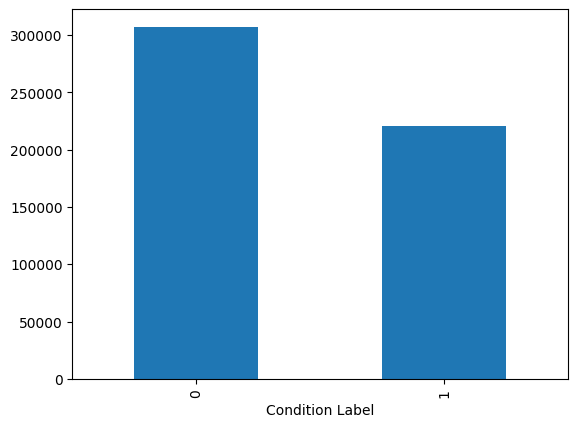

In [21]:
# Plot the distribution of class values
dfs['Condition Label'].value_counts().plot(kind='bar')

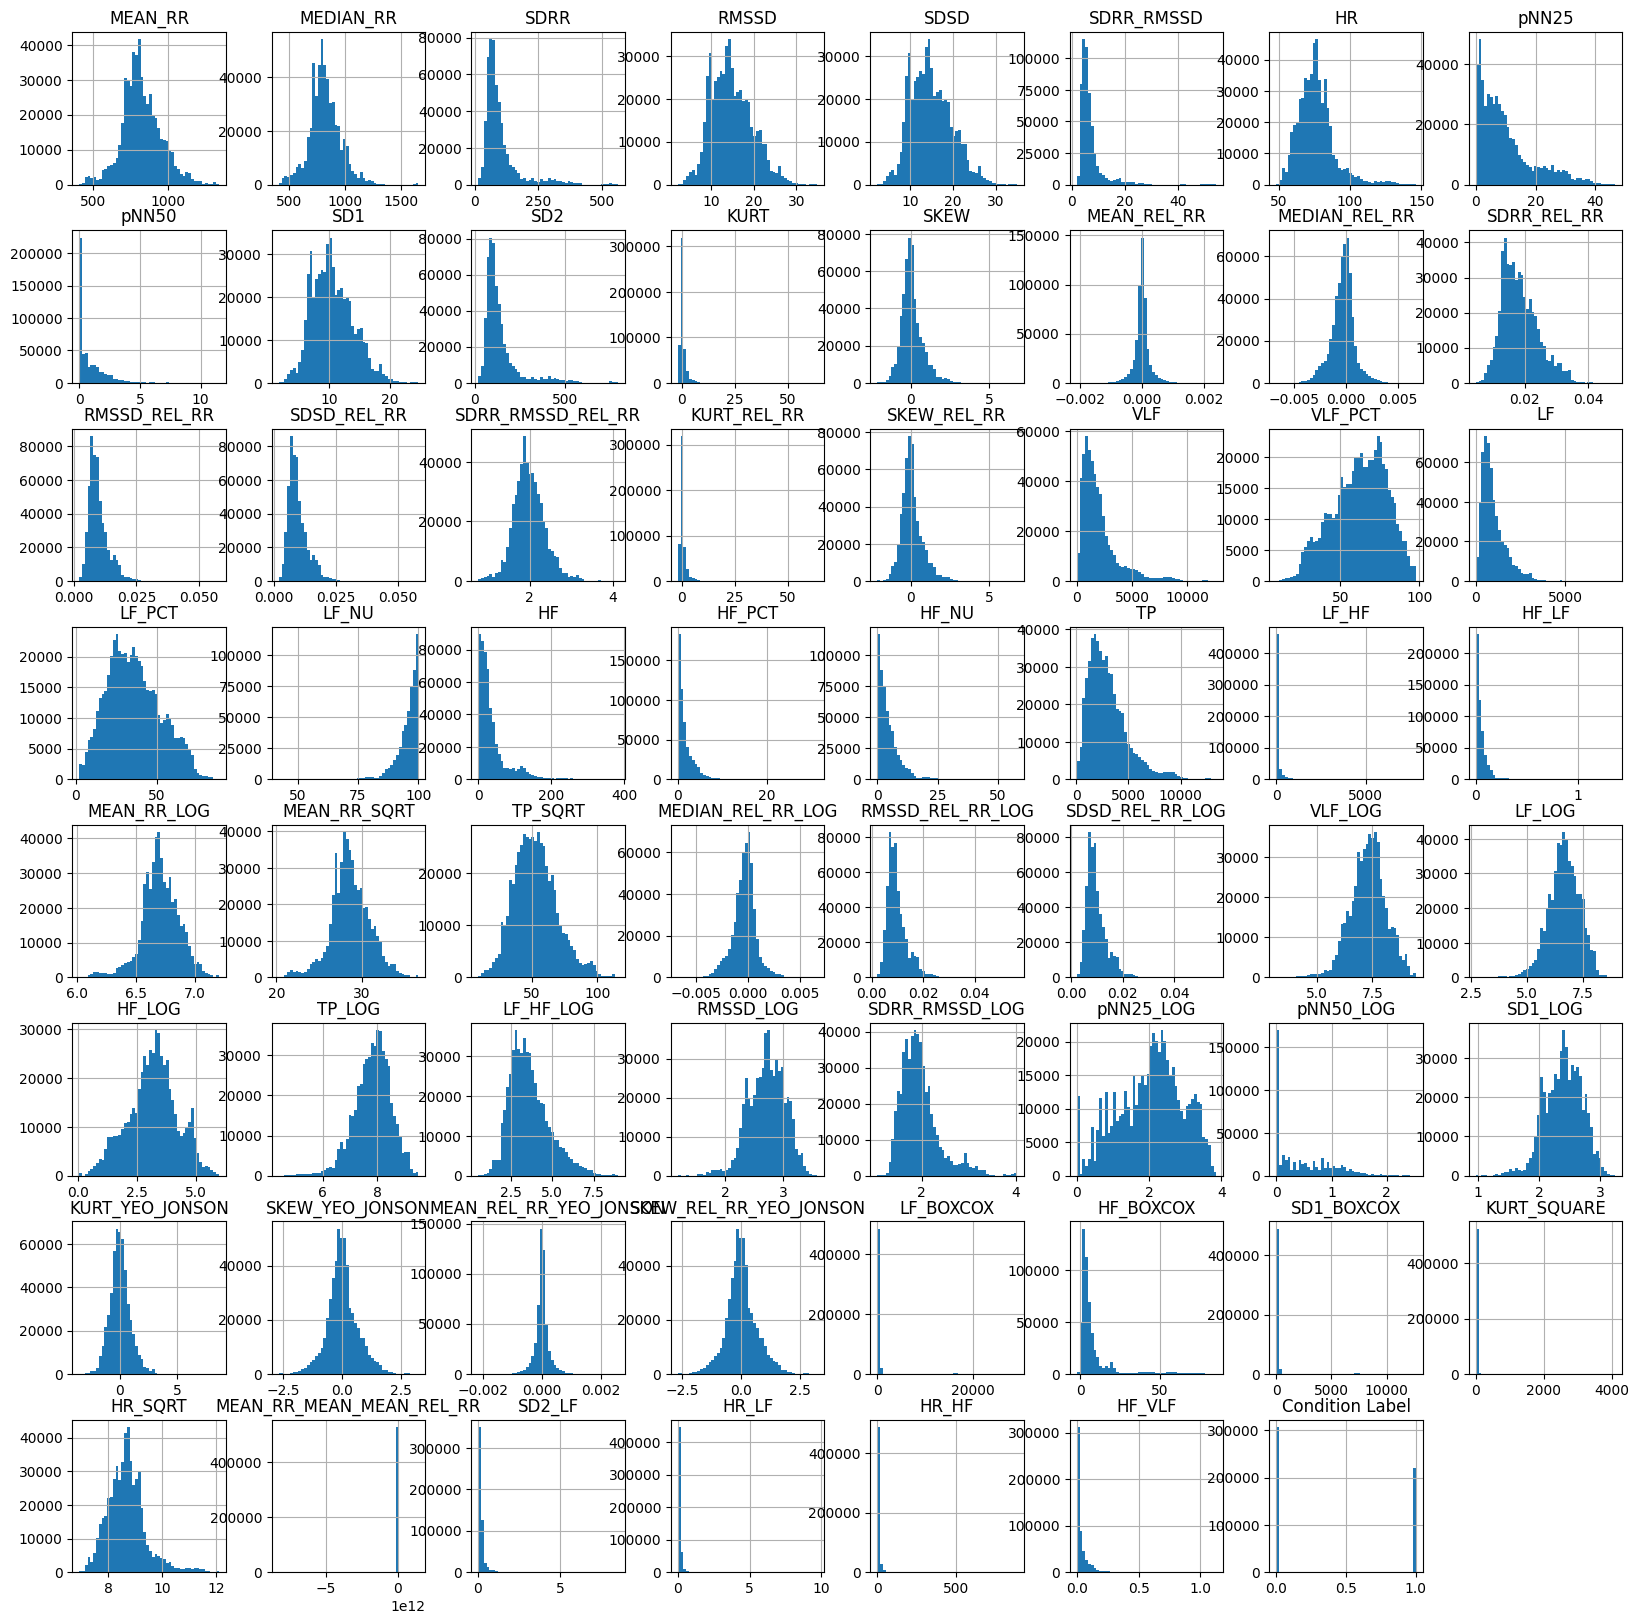

In [ ]:
dfs.drop('subject_id', axis = 1).hist(bins=50, figsize=(25,25))
plt.show()

In [22]:
dfs.describe()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,SD1_BOXCOX,KURT_SQUARE,HR_SQRT,MEAN_RR_MEAN_MEAN_REL_RR,SD2_LF,HR_LF,HR_HF,HF_VLF,subject_id,Condition Label
count,527288.000000,527288.000000,527288.000000,527288.000000,527288.000000,527288.000000,527288.000000,527288.000000,527288.000000,527288.000000,...,527288.000000,5.272880e+05,527288.000000,5.272880e+05,527288.000000,527288.000000,527288.000000,527288.000000,527288.000000,527288.000000
mean,825.623671,821.879556,99.391251,14.826170,14.824776,6.843914,76.031464,10.009816,0.911150,10.488608,...,304.447325,3.003881e+00,8.690874,-9.760075e+06,0.216330,0.137178,6.872461,0.035442,18.008731,0.417578
std,131.808026,138.872686,70.719814,4.751632,4.751520,4.675820,12.795246,9.012827,1.273771,3.362057,...,1490.139837,2.742124e+01,0.707232,1.187831e+10,0.396312,0.250683,23.980374,0.055029,11.154122,0.493160
min,411.068840,411.966595,13.786706,2.294390,2.292144,1.887603,48.183943,0.000000,0.000000,1.622825,...,0.124982,5.825336e-12,6.941465,-8.314308e+12,0.021295,0.008200,0.261909,0.000009,1.000000,0.000000
25%,742.576228,736.535125,60.071674,11.207429,11.206661,4.365840,67.800599,3.066667,0.000000,7.929358,...,0.842914,5.655020e-02,8.234112,-8.916395e+06,0.088569,0.057160,1.744389,0.005716,9.000000,0.000000
50%,812.690230,810.108175,77.948331,14.294383,14.293472,5.611998,74.910249,7.466667,0.400000,10.111528,...,2.407215,2.380369e-01,8.655071,-9.649217e+05,0.150472,0.093272,3.183464,0.016578,18.000000,0.000000
75%,903.038084,899.105353,107.968322,18.022242,18.020755,7.398561,82.292722,13.533333,1.400000,12.749441,...,15.677751,8.435835e-01,9.071534,9.101981e+06,0.218227,0.147147,6.234429,0.043272,26.000000,1.000000
max,1341.611513,1653.122250,563.486949,34.881131,34.880732,54.523950,146.191044,46.750000,11.500000,24.695368,...,12664.594280,4.107285e+03,12.090949,1.444233e+12,8.509626,9.714187,881.163906,1.129262,40.000000,1.000000


In [23]:
q1 = dfs.quantile(0.25)
q3 = dfs.quantile(0.75)
iqr = q3 - q1

# Remove the outliers
dfs = dfs[~((dfs < (q1 - 1.5 * iqr))|(dfs > (q3 + 1.5 * iqr))).any(axis=1)]
dfs = dfs.reset_index(drop=True)
dfs.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,SD1_BOXCOX,KURT_SQUARE,HR_SQRT,MEAN_RR_MEAN_MEAN_REL_RR,SD2_LF,HR_LF,HR_HF,HF_VLF,subject_id,Condition Label
0,820.137142,836.800665,107.879842,17.077352,17.076497,6.317130,74.687574,13.466667,0.600000,12.078936,...,0.629808,0.632315,8.642197,-3.469434e+06,0.076524,0.037580,3.795796,0.013737,2,1
1,716.399934,745.647205,127.779239,15.836261,15.835732,8.068776,86.920960,10.466667,0.600000,11.201290,...,2.352294,0.468034,9.323141,-3.132061e+06,0.190040,0.091586,1.152694,0.015717,19,0
2,784.082946,785.677695,71.057678,13.906820,13.906642,5.109556,77.204795,7.066667,0.200000,9.836763,...,1.367834,0.357468,8.786626,7.959503e+06,0.088632,0.068423,2.896829,0.016836,5,0
3,765.689008,779.893345,93.721570,13.310134,13.309693,7.041369,79.737488,4.733333,0.666667,9.414515,...,0.729466,0.427715,8.929585,5.968421e+06,0.136371,0.082249,3.197176,0.011772,9,0
4,816.343996,820.342555,52.867502,9.979671,9.979594,5.297519,73.813018,1.866667,0.000000,7.058994,...,1.646265,0.127774,8.591450,-1.290048e+07,0.195901,0.194272,3.120072,0.031507,17,1


In [24]:
dfs.columns

Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'SD1', 'SD2', 'KURT', 'SKEW', 'MEAN_REL_RR',
       'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR',
       'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR', 'VLF', 'VLF_PCT',
       'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF',
       'HF_LF', 'MEAN_RR_LOG', 'MEAN_RR_SQRT', 'TP_SQRT', 'MEDIAN_REL_RR_LOG',
       'RMSSD_REL_RR_LOG', 'SDSD_REL_RR_LOG', 'VLF_LOG', 'LF_LOG', 'HF_LOG',
       'TP_LOG', 'LF_HF_LOG', 'RMSSD_LOG', 'SDRR_RMSSD_LOG', 'pNN25_LOG',
       'pNN50_LOG', 'SD1_LOG', 'KURT_YEO_JONSON', 'SKEW_YEO_JONSON',
       'MEAN_REL_RR_YEO_JONSON', 'SKEW_REL_RR_YEO_JONSON', 'LF_BOXCOX',
       'HF_BOXCOX', 'SD1_BOXCOX', 'KURT_SQUARE', 'HR_SQRT',
       'MEAN_RR_MEAN_MEAN_REL_RR', 'SD2_LF', 'HR_LF', 'HR_HF', 'HF_VLF',
       'subject_id', 'Condition Label'],
      dtype='object')

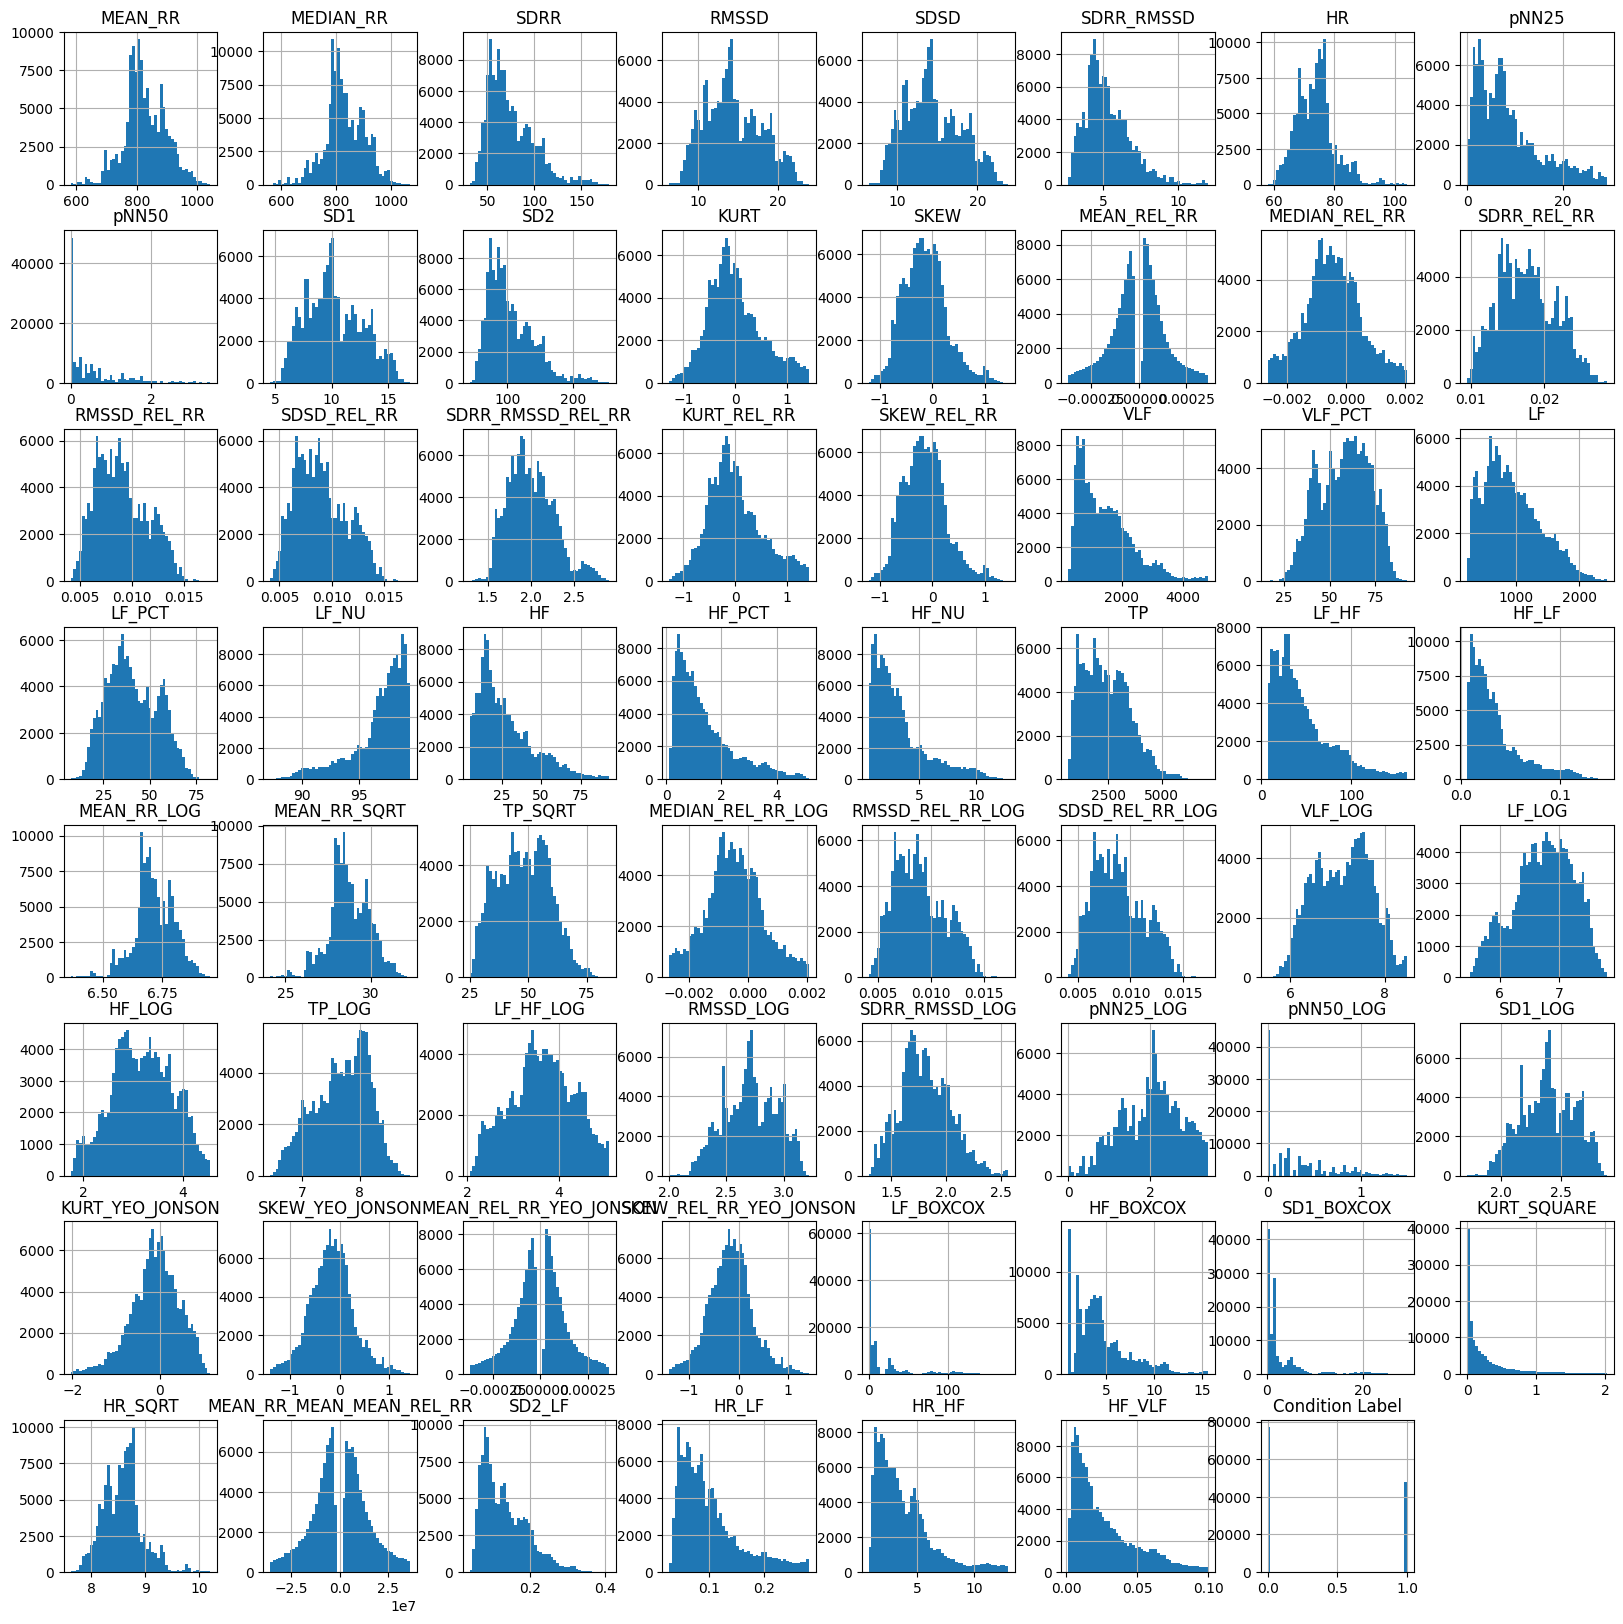

In [25]:
dfs.drop('subject_id', axis = 1).hist(bins=50, figsize=(20,20))
plt.show()

In [26]:
col_names = dfs[dfs.columns[~dfs.columns.isin(['subject_id', 'Condition Label'])]]
col_names = col_names.columns
print(len(col_names))
print(col_names)

62
Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'SD1', 'SD2', 'KURT', 'SKEW', 'MEAN_REL_RR',
       'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR',
       'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR', 'VLF', 'VLF_PCT',
       'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF',
       'HF_LF', 'MEAN_RR_LOG', 'MEAN_RR_SQRT', 'TP_SQRT', 'MEDIAN_REL_RR_LOG',
       'RMSSD_REL_RR_LOG', 'SDSD_REL_RR_LOG', 'VLF_LOG', 'LF_LOG', 'HF_LOG',
       'TP_LOG', 'LF_HF_LOG', 'RMSSD_LOG', 'SDRR_RMSSD_LOG', 'pNN25_LOG',
       'pNN50_LOG', 'SD1_LOG', 'KURT_YEO_JONSON', 'SKEW_YEO_JONSON',
       'MEAN_REL_RR_YEO_JONSON', 'SKEW_REL_RR_YEO_JONSON', 'LF_BOXCOX',
       'HF_BOXCOX', 'SD1_BOXCOX', 'KURT_SQUARE', 'HR_SQRT',
       'MEAN_RR_MEAN_MEAN_REL_RR', 'SD2_LF', 'HR_LF', 'HR_HF', 'HF_VLF'],
      dtype='object')


In [27]:
X = dfs[dfs.columns[~dfs.columns.isin(['subject_id', 'Condition Label'])]]
y = dfs['Condition Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [28]:
# Print the train-test ratio:

print('Total:', len(dfs))
print('Training shape:', X_train.shape)
print('Testing shape:', X_test.shape)
print('Training %:', (len(X_train) / len(dfs)) * 100)
print('Testing %:', (len(X_test) / len(dfs)) * 100)

Total: 125106
Training shape: (87574, 62)
Testing shape: (37532, 62)
Training %: 69.99984013556504
Testing %: 30.000159864434963


In [29]:
scaler = StandardScaler()

In [30]:
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.fit_transform(X_test)

In [31]:
# baseline
logreg = Pipeline([
    ('preprocessor', scaler),
    ('classifier', LogisticRegression(solver='lbfgs', max_iter=1000)),
])

In [32]:
logreg.fit(X_train, y_train)
print("Accuracy: %.3f" % logreg.score(X_train, y_train))

Accuracy: 0.800


In [33]:
logreg.fit(X_test, y_test)
print("Accuracy: %.3f" % logreg.score(X_test, y_test))

Accuracy: 0.801


In [34]:
# ANOVA F-value

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

def select_features(X_train, y_train):
    fs = SelectKBest(score_func=f_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)

    return X_train_fs, fs

In [35]:
# feature selection
X_train_fs, fs = select_features(X_train, y_train)

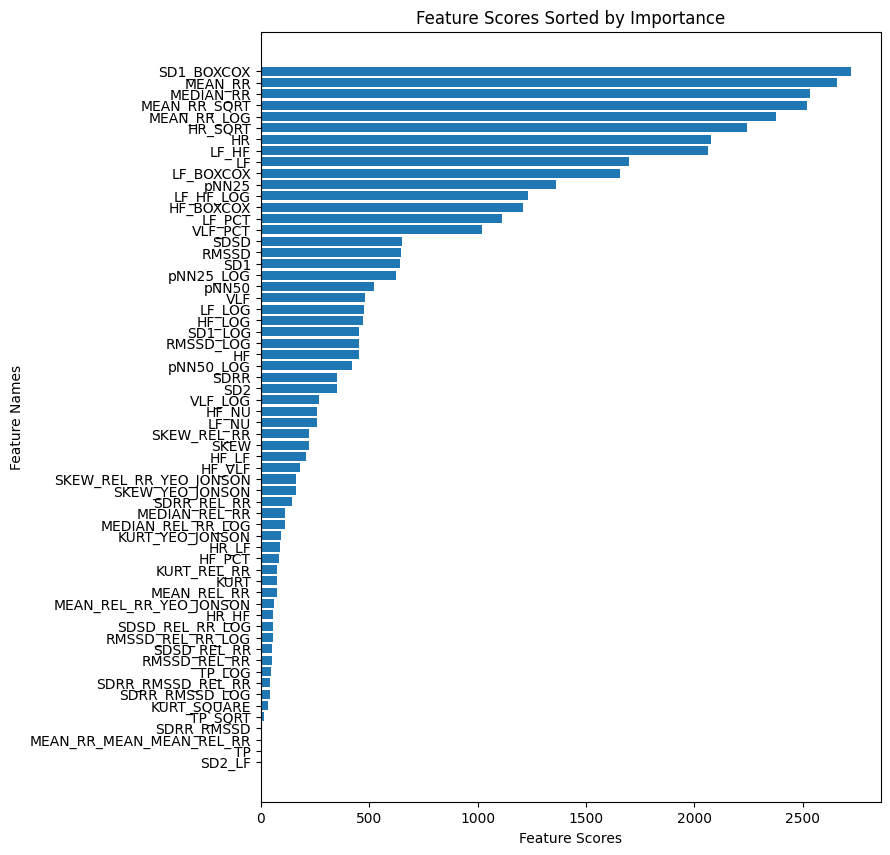

In [36]:
sorted_ = pd.DataFrame({'fs_scores': fs.scores_, 'col_names': col_names})
sorted_ = sorted_.sort_values('fs_scores')
plt.figure(figsize=(8, 10))
plt.barh('col_names', 'fs_scores',data=sorted_)
plt.xlabel('Feature Scores')
plt.ylabel('Feature Names')
plt.title('Feature Scores Sorted by Importance')
plt.show()

In [37]:
anova = SelectKBest(f_classif, k=15)

# **Model Building**

In [38]:
# Refit models with best_params_

rf_best = Pipeline([
    ('preprocessor', scaler),
    ('selector', anova),
    ('classifier', RandomForestClassifier(max_depth=8,
                                          n_estimators=200,
                                          max_features='sqrt',
                                          min_samples_leaf=4,
                                          random_state=42)),
])

svc_best = Pipeline([
    ('preprocessor', scaler),
    ('selector', anova),
    ('classifier', SVC(kernel='linear',
                       C=0.1,
                       gamma=0,
                       random_state=42,
                       probability=True)),
])

dt_best = Pipeline([
    ('preprocessor', scaler),
    ('selector', anova),
    ('classifier', DecisionTreeClassifier(criterion='gini',
                                          max_depth=8,
                                          max_features='auto',
                                          min_samples_leaf=4,
                                          random_state=42)),
])

xgb_best = Pipeline([
    ('preprocessor', scaler),
    ('selector', anova),
    ('classifier', GradientBoostingClassifier(learning_rate=0.01,
                                              max_depth=8,
                                              n_estimators=150,
                                              subsample=0.1)),
])

In [39]:
classifiers = {'LogisticRegression': logreg,
               'RandomForest': rf_best,
               'SVC': svc_best,
               'DecisionTree': dt_best,
               'GradientBoost': xgb_best
      }

In [42]:
# Define the classification metrics as lists
accuracy = []
precision = []
recall = []
f1 = []

# Define a list to collect auc results
auc_list = []

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    probs = clf.predict_proba(X_test)[:, 1]

    accuracy_score = clf.score(X_test, y_test)
    accuracy.append(accuracy_score)

    precision_score = metrics.precision_score(y_test, y_pred, pos_label=1)
    precision.append(precision_score)

    recall_score = metrics.recall_score(y_test, y_pred, pos_label=1)
    recall.append(recall_score)

    f1_score = metrics.f1_score(y_test, y_pred, pos_label=1)
    f1.append(f1_score)

    fpr, tpr, _ = metrics.roc_curve(y_test, probs, pos_label=1)
    auc = metrics.roc_auc_score(y_test, probs)

    # Append the dictionary to the list
    auc_list.append({'model': name, 'fpr': fpr, 'tpr': tpr, 'auc': auc})

# Convert the list of dictionaries to a DataFrame
auc_df = pd.DataFrame(auc_list)

# Now you can print or use auc_df as needed
print(auc_df)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


                model                                                fpr  \
0  LogisticRegression  [0.0, 0.0, 0.0, 4.326007959854646e-05, 4.32600...   
1        RandomForest  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2                 SVC  [0.0, 4.326007959854646e-05, 0.000432600795985...   
3        DecisionTree  [0.0, 4.326007959854646e-05, 0.000173040318394...   
4       GradientBoost  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                 tpr       auc  
0  [0.0, 6.936736958934517e-05, 0.002081021087680...  0.864113  
1  [0.0, 0.0006936736958934517, 0.002774694783573...  0.998815  
2  [0.0, 0.0, 0.0, 0.00013873473917869035, 0.0001...  0.752796  
3  [0.0, 0.345865704772475, 0.3777746947835738, 0...  0.966915  
4  [0.0, 6.936736958934517e-05, 0.000277469478357...  0.999824  


In [43]:
# Create DataFrame of classification metrics

df_models = pd.DataFrame()
df_models['model'] = classifiers.keys()
df_models['accuracy'] = accuracy
df_models['precision'] = precision
df_models['recall'] = recall
df_models['f1'] = f1

df_models

,model,accuracy,precision,recall,f1
0,LogisticRegression,0.800757,0.785233,0.662458,0.718639
1,RandomForest,0.973249,0.996888,0.933269,0.964030
2,SVC,0.697751,0.752964,0.317148,0.446310
3,DecisionTree,0.925477,0.927515,0.874306,0.900125
4,GradientBoost,0.989849,0.998579,0.974958,0.986627


In [44]:
# Set model names as index
auc_df.set_index('model', inplace=True)
auc_df

,fpr,tpr,auc
model,,,
LogisticRegression,"[0.0, 0.0, 0.0, 4.326007959854646e-05, 4.32600...","[0.0, 6.936736958934517e-05, 0.002081021087680...",0.864113
RandomForest,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0006936736958934517, 0.002774694783573...",0.998815
SVC,"[0.0, 4.326007959854646e-05, 0.000432600795985...","[0.0, 0.0, 0.0, 0.00013873473917869035, 0.0001...",0.752796
DecisionTree,"[0.0, 4.326007959854646e-05, 0.000173040318394...","[0.0, 0.345865704772475, 0.3777746947835738, 0...",0.966915
GradientBoost,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 6.936736958934517e-05, 0.000277469478357...",0.999824


In [45]:
auc_df1 = auc_df.reset_index(drop=True)
auc_df1['model'] = ['LogisticRegression (Baseline)', 'RandomForest', 'SVC', 'DecisionTree', 'GradientBoost']
auc_df1.set_index('model', inplace=True)
auc_df1

,fpr,tpr,auc
model,,,
LogisticRegression (Baseline),"[0.0, 0.0, 0.0, 4.326007959854646e-05, 4.32600...","[0.0, 6.936736958934517e-05, 0.002081021087680...",0.864113
RandomForest,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0006936736958934517, 0.002774694783573...",0.998815
SVC,"[0.0, 4.326007959854646e-05, 0.000432600795985...","[0.0, 0.0, 0.0, 0.00013873473917869035, 0.0001...",0.752796
DecisionTree,"[0.0, 4.326007959854646e-05, 0.000173040318394...","[0.0, 0.345865704772475, 0.3777746947835738, 0...",0.966915
GradientBoost,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 6.936736958934517e-05, 0.000277469478357...",0.999824


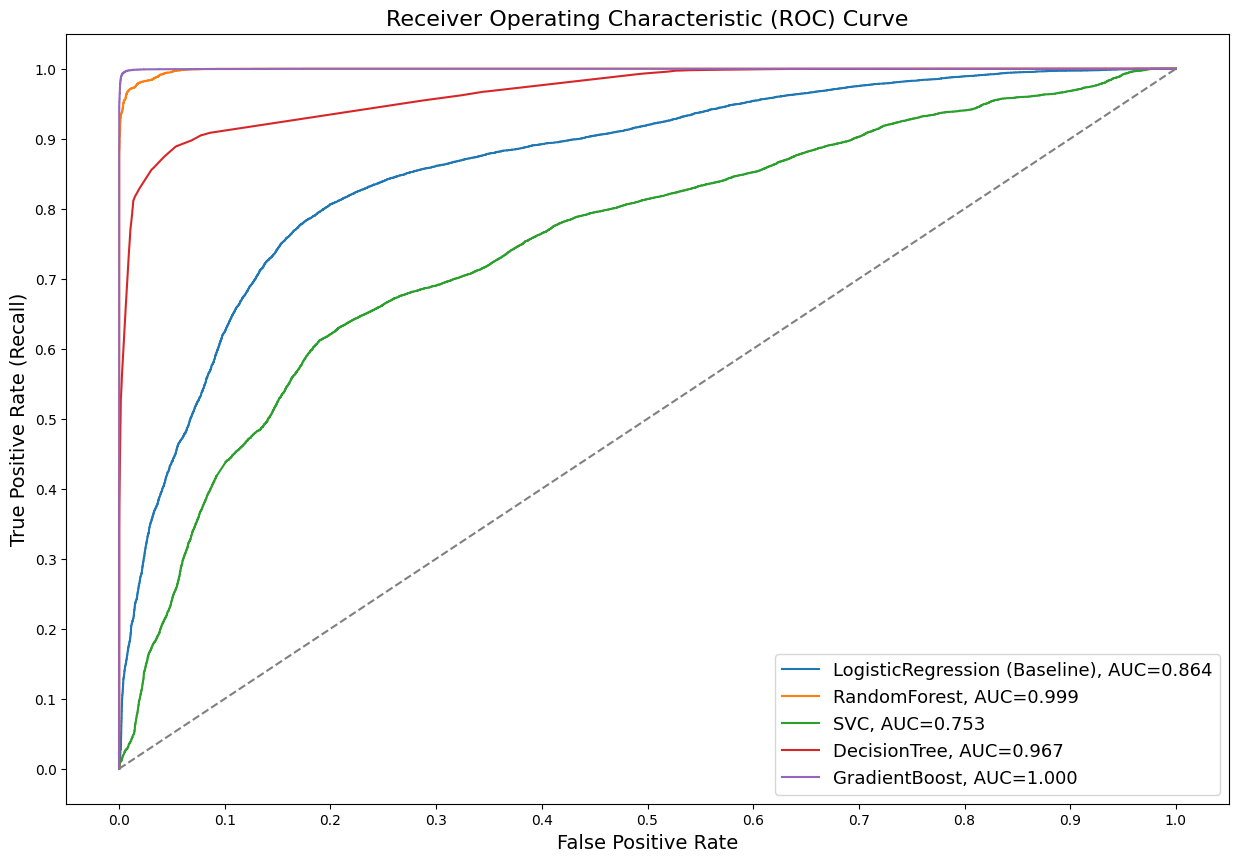

In [46]:
# plot the AUC
fig = plt.figure(figsize=(15, 10))

for i in auc_df1.index:
    plt.plot(auc_df1.loc[i]['fpr'],
             auc_df1.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, auc_df1.loc[i]['auc']))

plt.plot([0,1], [0,1], color='grey', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel('False Positive Rate', fontsize=14)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel('True Positive Rate (Recall)', fontsize=14)

plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

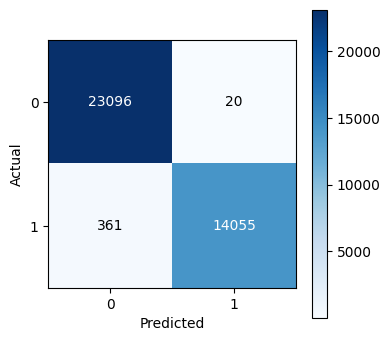

In [53]:
# Compute the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)

# Get the class labels from the classifier
labels = xgb_best.classes_

# Create the plot
fig, ax = plt.subplots(figsize=(4, 4))
cax = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.grid(False)

# Set ticks and labels
ax.set_xticks(range(len(labels)))
ax.set_yticks(range(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Set axis labels
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Ensure the correct limits
ax.set_ylim(len(labels) - 0.5, -0.5)

# Add colorbar
plt.colorbar(cax)

# Annotate each cell with the numeric value
thresh = cm.max() / 2.0
for i in range(len(labels)):
    for j in range(len(labels)):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

# Display the plot
plt.show()


In [54]:
# End the timer
end_time = time.time()
# Calculate the computational time
computational_time = end_time - start_time
print("Computational time:", computational_time)

Computational time: 4936.7734842300415
